<a href="https://colab.research.google.com/github/geo-tp/Keras-Colaboratory-Models/blob/main/kfold_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###K-FOLD VALIDATION###

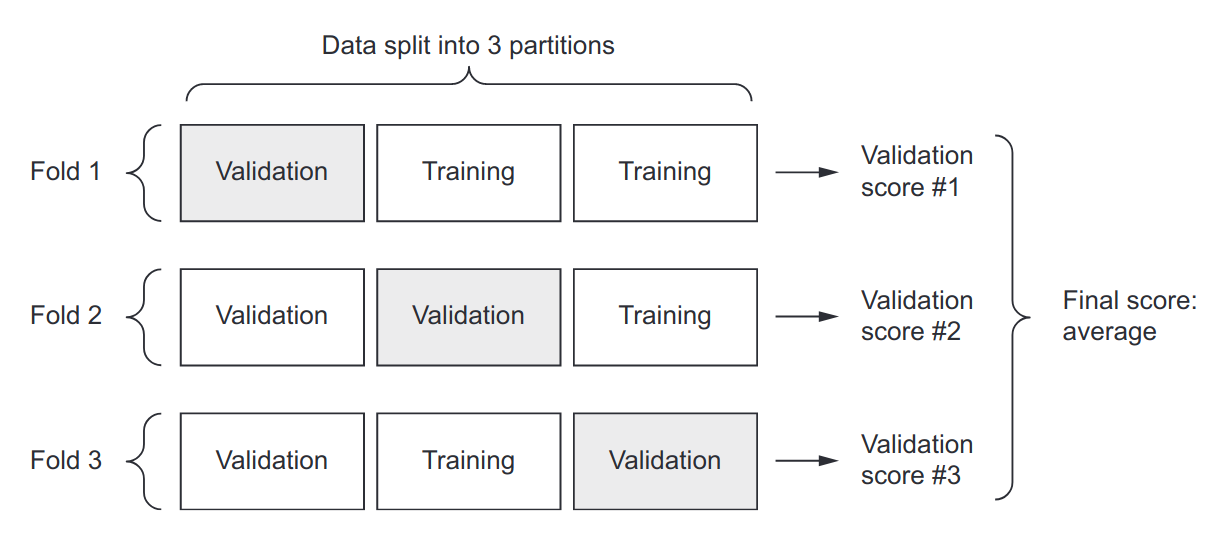

In [ ]:
# DATASET - Boston Housing

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Process values to be on same axis
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
# MODEL DEFINITION - this model should predict house price

from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, activation='relu',
            input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

  return model

In [ ]:
# TRAINING WITH K FOLD VALIDATION - we split trainset into K partitions 

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_val_mae_histories = []

for i in range(k):
  print('processing fold #', i)

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
  
  partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
  
  model = build_model()

  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=32)
  
  # Max Average Error
  val_mae_history = history.history['val_mae']
  all_val_mae_histories.append(val_mae_history)

processing fold # 0
Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 553.6442 - mae: 21.7025 - val_loss: 512.6088 - val_mae: 20.3625
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 519.1772 - mae: 20.8876 - val_loss: 480.6382 - val_mae: 19.5767
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 487.7669 - mae: 20.1178 - val_loss: 447.4563 - val_mae: 18.7441
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 454.7243 - mae: 19.3010 - val_loss: 412.9601 - val_mae: 17.8520
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 419.4821 - mae: 18.3987 - val_loss: 375.1612 - val_mae: 16.8402
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 381.2703 - mae: 17.3891 - val_loss: 333.7802 - val_mae: 15.7253
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 340.2444 - mae: 16.2690 - val_loss: 292.8057 - val_mae: 14.5721
Epoch 8/100
10/10 [=

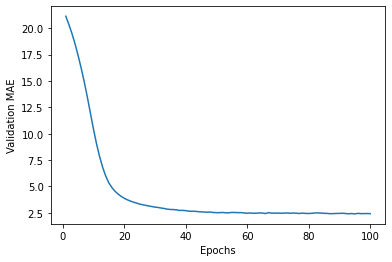

In [ ]:
# LOG VALIDATION RESULTS

import matplotlib.pyplot as plt

# Final validation score average
average_mae_history = [
  np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)
]

plt.plot(range(1, num_epochs + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# EVALUATION

score = model.evaluate(test_data, test_targets)
print(model.metrics_names)
print(score)

4/4 [==============================] - 0s 3ms/step - loss: 22.7220 - mae: 2.9162
['loss', 'mae']
[22.72197914123535, 2.916238784790039]
